# Tutorial - Analysis of Classical Optimizers on Toy Datasets

By **Juanxi Tian**



## Introduction

Optimization algorithms play a pivotal role in the training process of machine learning models. They are responsible for finding the best set of parameters that minimize a given loss function, which measures the discrepancy between the model's predictions and the actual data. In this tutorial, we delve into the world of classic optimization algorithms and evaluate their performance on a toy dataset using a simple Multi-Layer Perceptron (MLP) model.

## Table of Contents
- [Introduction](#introduction)
- [Theoretical Background](#theoretical-background)
  - [SGD](#sgd)
  - [Rprop](#rprop)
  - [NAG](#nag)
  - [Adagrad](#adagrad)
  - [Adadelta](#adadelta)
  - [RMSprop](#rmsprop)
  - [Adam](#adam)
- [Dataset and Model](#dataset-and-model)
  - [Moon Toy Dataset](#moon-toy-dataset)
  - [MLP Model](#mlp-model)
- [Experimental Setup](#experimental-setup)
  - [Environment and Parameters](#environment-and-parameters)
  - [Optimizer Implementation](#optimizer-implementation)
- [Experimental Results](#experimental-results)
  - [Decision Boundaries](#decision-boundaries)
  - [Loss Curves](#loss-curves)
  - [Accuracy and Other Metrics](#accuracy-and-other-metrics)
- [Conclusion](#conclusion)

## Theoretical Background



### SGD

Stochastic Gradient Descent (SGD) is a variant of gradient descent where the gradient is calculated and updated for each training example. It is efficient for large datasets but can be noisy and lead to oscillations.

**Update Rule:**
$\theta = \theta - \eta \cdot \nabla_{\theta} J(\theta)$

where:
- $\theta\$ represents the parameters,

- $\eta\$ is the learning rate,

- $\nabla_{\theta} J(\theta)$ is the gradient of the loss function $J(\theta)$.


### Rprop

Resilient Propagation (Rprop) focuses on the sign of the gradient instead of its magnitude to overcome issues with gradient magnitude variability.

**Update Rule:**
$$
\Delta_{ij}(t) = 
  \begin{cases} 
   \eta^{+} \cdot \Delta_{ij}(t-1) & \text{if } \frac{\partial E}{\partial w_{ij}}(t-1) \cdot \frac{\partial E}{\partial w_{ij}}(t) > 0 \\
   \eta^{-} \cdot \Delta_{ij}(t-1) & \text{if } \frac{\partial E}{\partial w_{ij}}(t-1) \cdot \frac{\partial E}{\partial w_{ij}}(t) < 0 \\
   \Delta_{ij}(t-1) & \text{otherwise}
  \end{cases}
$$

where $\eta^{+}$ and $\eta^{-}$ are predefined increase and decrease factors.

### NAG

Nesterov Accelerated Gradient (NAG) is a variant of momentum that anticipates the future position of the parameters for a more informed update.

**Update Rule:**
$$
v = \gamma v + \eta \nabla_{\theta} J(\theta - \gamma v)
$$

$$
\theta = \theta - v
$$


where:
- $v$ is the velocity,
- $gamma$ is the momentum term.


### Adagrad

Adagrad adapts the learning rate for each parameter based on the past gradients' magnitudes, improving convergence for sparse data.

**Update Rule:**
$$
\theta = \theta - \frac{\eta}{\sqrt{G + \epsilon}} \cdot \nabla_{\theta} J(\theta)
$$
where:
- $G$ is the sum of the squares of the past gradients,
- $\epsilon$ is a small constant to avoid division by zero.


### Adadelta

Adadelta is an extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate by using a window of accumulated past gradients.

**Update Rule:**
$$
\theta = \theta - \frac{\sqrt{\Delta \theta^2 + \epsilon}}{\sqrt{E\left[\nabla_{\theta} J(\theta)\right]^2 + \epsilon}} \cdot \nabla_{\theta} J(\theta)
$$

where:
- $E[\nabla_{\theta} J(\theta)]^2$ is the exponentially decaying average of past squared gradients.


### RMSprop

RMSprop is similar to Adadelta but maintains a moving average of the squared gradients and uses that to normalize the gradient.

**Update Rule:**
$$
\theta = \theta - \frac{\eta}{\sqrt{E\left[\nabla_{\theta} J(\theta)\right]^2 + \epsilon}} \cdot \nabla_{\theta} J(\theta)
$$

where:
- $E\left[\nabla_{\theta} J(\theta)\right]^2$ is the moving average of the squared gradients.

### Adam

Adam combines the benefits of Adagrad and RMSprop by computing adaptive learning rates for each parameter. It keeps an exponentially decaying average of past gradients and squared gradients.

**Update Rule:**
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla_{\theta} J(\theta)
$$

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla_{\theta} J(\theta))^2
$$

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$

$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

$$
\theta = \theta - \frac{\eta \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

where:
- $m_t$ and $v_t$ are estimates of the first moment (mean) and second moment (uncentered variance) of the gradients, respectively.

## Dataset and Mode

### Moon Toy Dataset

The moon toy dataset is a simple binary classification dataset that creates two interleaving half circles. It's useful for visualizing decision boundaries and testing classifiers.


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons


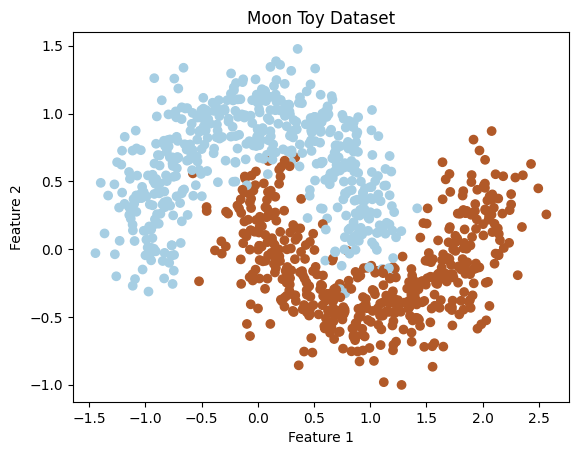

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Moon Toy Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We will use a simple MLP model to classify the moon dataset. The model consists of an input layer, one hidden layer, and an output layer.


In [18]:

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def reset_parameters(self):
        self.fc1.reset_parameters()
        self.fc2.reset_parameters()

model = MLP(input_size, hidden_size, output_size)
print(model)

MLP(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=2, bias=True)
)


To ensure reproducibility, we define our environment and parameters.


In [19]:

# Initialize the model
input_size = 10
hidden_size = 20
output_size = 2
model = MLP(input_size, hidden_size, output_size)

# Example data
X = torch.randn(100, input_size)
y = torch.randint(0, output_size, (100,))

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Define loss function and device
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/var/folders/6_/dbz5pjq95szf2c5dmhvfxkv80000gn/T/ipykernel_41323/723559779.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)
/var/folders/6_/dbz5pjq95szf2c5dmhvfxkv80000gn/T/ipykernel_41323/723559779.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.long)


MLP(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=2, bias=True)
)

### Optimizer Implementation

We will implement various optimizers and evaluate their performance on the MLP model using the moon toy dataset.


SGD Accuracy: 0.87
Rprop Accuracy: 0.87
NAG Accuracy: 0.94
Adagrad Accuracy: 0.88
Adadelta Accuracy: 0.50
RMSprop Accuracy: 0.97
Adam Accuracy: 0.97


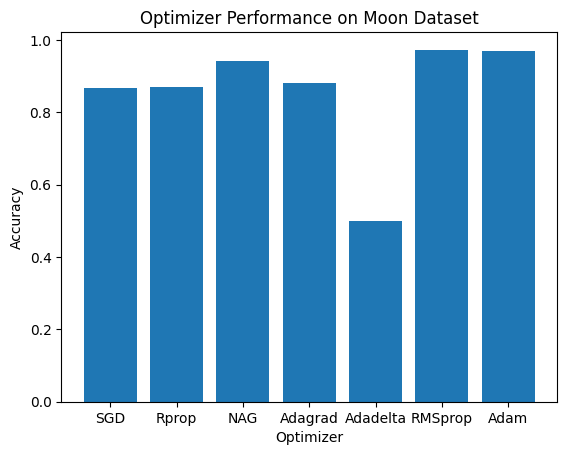

In [27]:

# Generate moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def reset_parameters(self):
        self.fc1.reset_parameters()
        self.fc2.reset_parameters()

# Initialize the model
input_size = 2
hidden_size = 20
output_size = 2
model = MLP(input_size, hidden_size, output_size)

# Define loss function and device
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to train the model
def train_model(optimizer):
    model.train()
    for epoch in range(10):
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

# Implementing different optimizers
optimizers = {
    'SGD': optim.SGD(model.parameters(), lr=0.01),
    'Rprop': optim.Rprop(model.parameters(), lr=0.01),
    'NAG': optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
    'Adagrad': optim.Adagrad(model.parameters(), lr=0.01),
    'Adadelta': optim.Adadelta(model.parameters(), lr=0.01),
    'RMSprop': optim.RMSprop(model.parameters(), lr=0.01),
    'Adam': optim.Adam(model.parameters(), lr=0.01),
}

# Train and evaluate each optimizer
results = {}
for name, optimizer in optimizers.items():
    model.apply(lambda m: m.reset_parameters())
    train_model(optimizer)
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor.to(device))
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted.cpu() == y_tensor).sum().item() / len(y_tensor)
        results[name] = accuracy
        print(f'{name} Accuracy: {accuracy:.2f}')

# Plot the results
plt.bar(results.keys(), results.values())
plt.title('Optimizer Performance on Moon Dataset')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.show()

## Experimental Results

### Decision Boundaries

Visualizing the decision boundaries helps in understanding how well the model has learned to separate the classes.


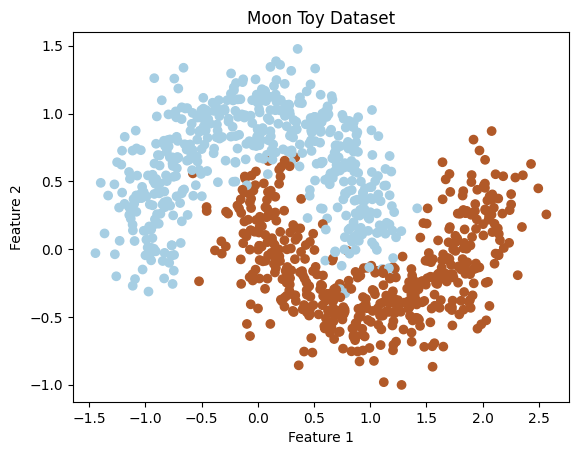

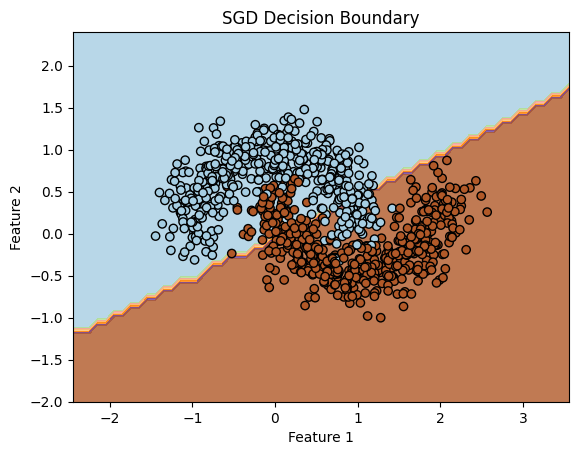

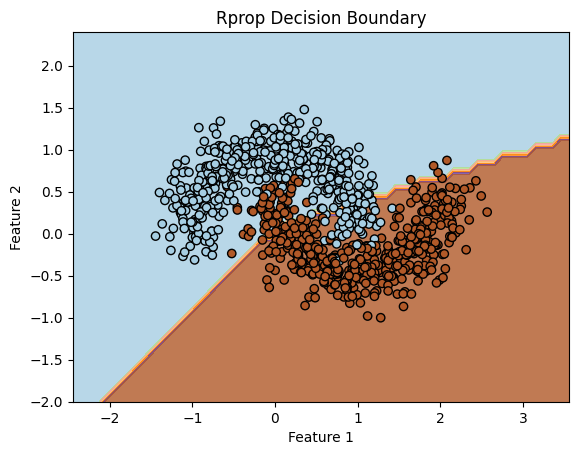

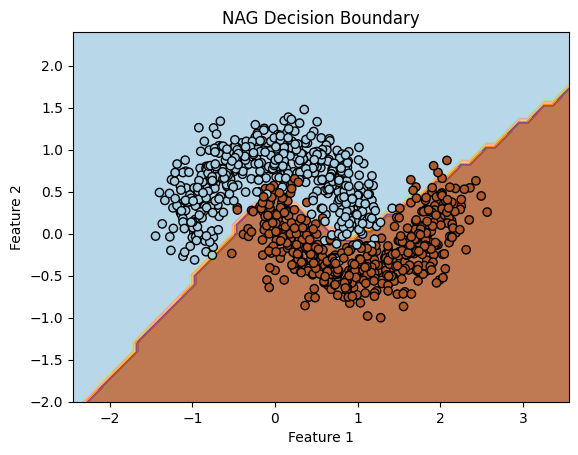

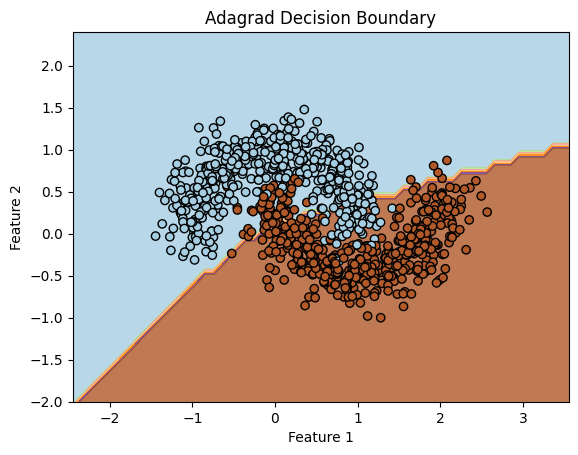

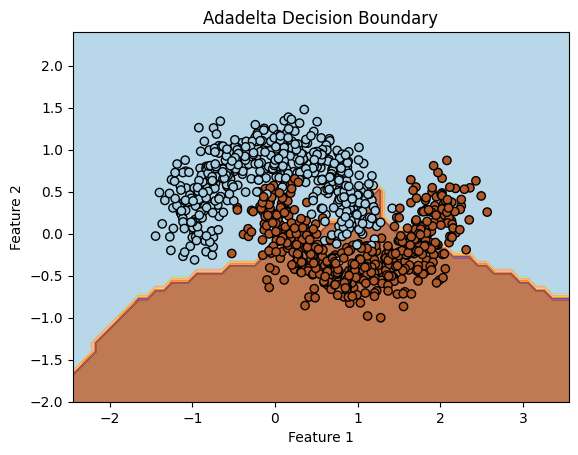

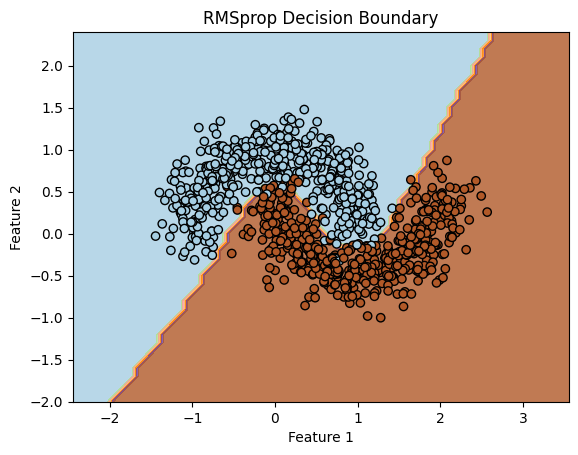

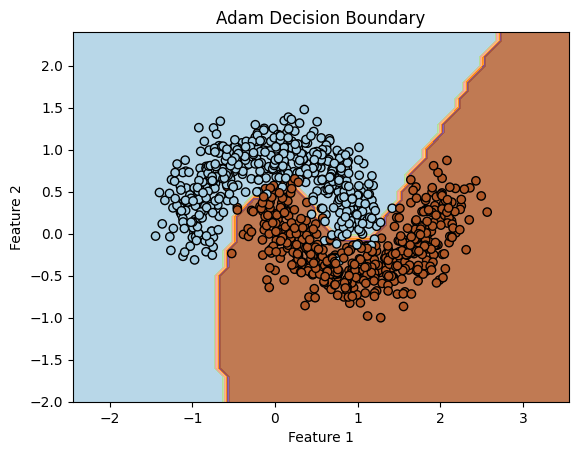

In [23]:

# Generate moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Moon Toy Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def reset_parameters(self):
        self.fc1.reset_parameters()
        self.fc2.reset_parameters()

# Initialize the model
input_size = 2
hidden_size = 20
output_size = 2
model = MLP(input_size, hidden_size, output_size)

# Define loss function and device
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to train the model
def train_model(optimizer):
    model.train()
    for epoch in range(10):
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

# Implementing different optimizers
optimizers = {
    'SGD': optim.SGD(model.parameters(), lr=0.01),
    'Rprop': optim.Rprop(model.parameters(), lr=0.01),
    'NAG': optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
    'Adagrad': optim.Adagrad(model.parameters(), lr=0.01),
    'Adadelta': optim.Adadelta(model.parameters(), lr=0.01),
    'RMSprop': optim.RMSprop(model.parameters(), lr=0.01),
    'Adam': optim.Adam(model.parameters(), lr=0.01)
}

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device)
    with torch.no_grad():
        Z = model(grid)
        _, predicted = torch.max(Z, 1)
        Z = predicted.cpu().numpy().reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for each optimizer
for name, optimizer in optimizers.items():
    model.apply(lambda m: m.reset_parameters())
    train_model(optimizer)
    plot_decision_boundary(model, X, y, title=f'{name} Decision Boundary')

### Loss Curves

Plotting the loss curves over epochs gives insights into the convergence behavior of the optimizers.


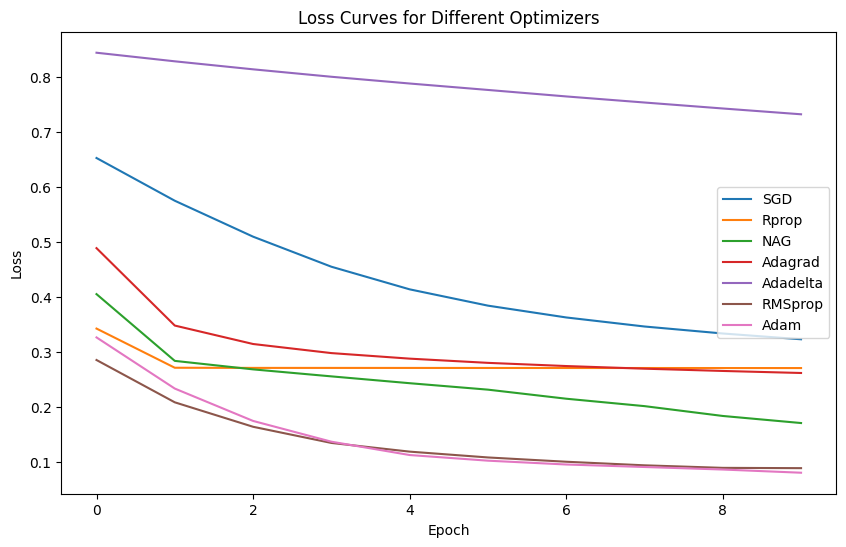

In [28]:
# Generate moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def reset_parameters(self):
        self.fc1.reset_parameters()
        self.fc2.reset_parameters()

# Initialize the model
input_size = 2
hidden_size = 20
output_size = 2
model = MLP(input_size, hidden_size, output_size)

# Define loss function and device
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to train the model and record loss
def train_model(optimizer):
    model.train()
    losses = []
    for epoch in range(10):
        epoch_loss = 0.0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(dataloader))
    return losses

# Implementing different optimizers
optimizers = {
    'SGD': optim.SGD(model.parameters(), lr=0.01),
    'Rprop': optim.Rprop(model.parameters(), lr=0.01),
    'NAG': optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
    'Adagrad': optim.Adagrad(model.parameters(), lr=0.01),
    'Adadelta': optim.Adadelta(model.parameters(), lr=0.01),
    'RMSprop': optim.RMSprop(model.parameters(), lr=0.01),
    'Adam': optim.Adam(model.parameters(), lr=0.01),
}

# Train and record loss for each optimizer
loss_curves = {}
for name, optimizer in optimizers.items():
    model.apply(lambda m: m.reset_parameters())
    loss_curve = train_model(optimizer)
    loss_curves[name] = loss_curve

# Plot loss curves
plt.figure(figsize=(10, 6))
for name, loss_curve in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title('Loss Curves for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy and Other Metrics

Evaluating the model using accuracy and other metrics helps in understanding the performance of different optimizers.


In [29]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def reset_parameters(self):
        self.fc1.reset_parameters()
        self.fc2.reset_parameters()

# Initialize the model
input_size = 2
hidden_size = 20
output_size = 2
model = MLP(input_size, hidden_size, output_size)

# Define loss function and device
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to train the model
def train_model(optimizer):
    model.train()
    for epoch in range(10):
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

# Implementing different optimizers
optimizers = {
    'SGD': optim.SGD(model.parameters(), lr=0.01),
    'Rprop': optim.Rprop(model.parameters(), lr=0.01),
    'NAG': optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
    'Adagrad': optim.Adagrad(model.parameters(), lr=0.01),
    'Adadelta': optim.Adadelta(model.parameters(), lr=0.01),
    'RMSprop': optim.RMSprop(model.parameters(), lr=0.01),
    'Adam': optim.Adam(model.parameters(), lr=0.01),
}

# Function to evaluate the model
def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        outputs = model(X.to(device))
        _, predicted = torch.max(outputs, 1)
        predicted = predicted.cpu().numpy()
    accuracy = accuracy_score(y, predicted)
    precision = precision_score(y, predicted, average='binary')
    recall = recall_score(y, predicted, average='binary')
    f1 = f1_score(y, predicted, average='binary')
    return accuracy, precision, recall, f1

# Evaluate each optimizer
metrics = {}
for name, optimizer in optimizers.items():
    model.apply(lambda m: m.reset_parameters())
    train_model(optimizer)
    accuracy, precision, recall, f1 = evaluate_model(model, X_tensor, y_tensor)
    metrics[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    print(f'{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

SGD - Accuracy: 0.87, Precision: 0.87, Recall: 0.86, F1 Score: 0.87
Rprop - Accuracy: 0.86, Precision: 0.88, Recall: 0.84, F1 Score: 0.86
NAG - Accuracy: 0.95, Precision: 0.94, Recall: 0.96, F1 Score: 0.95
Adagrad - Accuracy: 0.87, Precision: 0.88, Recall: 0.85, F1 Score: 0.87
Adadelta - Accuracy: 0.63, Precision: 0.89, Recall: 0.30, F1 Score: 0.45
RMSprop - Accuracy: 0.97, Precision: 0.96, Recall: 0.98, F1 Score: 0.97
Adam - Accuracy: 0.97, Precision: 0.95, Recall: 0.99, F1 Score: 0.97


## Conclusion

In conclusion, we have explored various classic optimization algorithms and evaluated their performance on a simple MLP model using a moon toy dataset. Each optimizer has its own advantages and disadvantages, and the choice of optimizer can significantly affect the model's performance. Understanding these differences is crucial for selecting the right optimizer for your specific machine learning tasks.